# Ejercicio 1

In [4]:
%pip install graphviz

     |████████████████████████████████| 47 kB 3.7 MB/s eta 0:00:011
You should consider upgrading via the '/home/aalejoz25/.pyenv/versions/3.10.2/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import time
import random
import graphviz

In [21]:
def solicitar_numero_complejo(mensaje):
    while True:
        try:
            numero = complex(input(mensaje))
            return numero
        except ValueError:
            print("Entrada no válida. Ingrese un número complejo en el formato a+bj.")

def calcular(num1, num2, operacion):
    try:
        if operacion == '+':
            return num1 + num2
        elif operacion == '-':
            return num1 - num2
        elif operacion == '*':
            return num1 * num2
        elif operacion == '/':
            return num1 / num2 if num2 != 0 else "Error: División por cero"
        else:
            return "Operación no válida"
    except Exception as e:
        return f"Error: {e}"

In [ ]:
print("Calculadora de Números Complejos")
num1 = solicitar_numero_complejo("Ingrese el primer número complejo (ejemplo: 1+2j): ")
print(f"Número 1: {num1}")
num2 = solicitar_numero_complejo("Ingrese el segundo número complejo (ejemplo: 3-4j): ")
print(f"Número 2: {num2}")

time.sleep(0.5)

while True:
    operacion = input("Seleccione la operación (+, -, *, /): ")
    if operacion in ['+', '-', '*', '/']:
        break
    print("Operación no válida. Intente de nuevo.")

print(f"Operación: {operacion}")
    
resultado = calcular(num1, num2, operacion)
print(f"Resultado: {resultado}")

## Diagrama

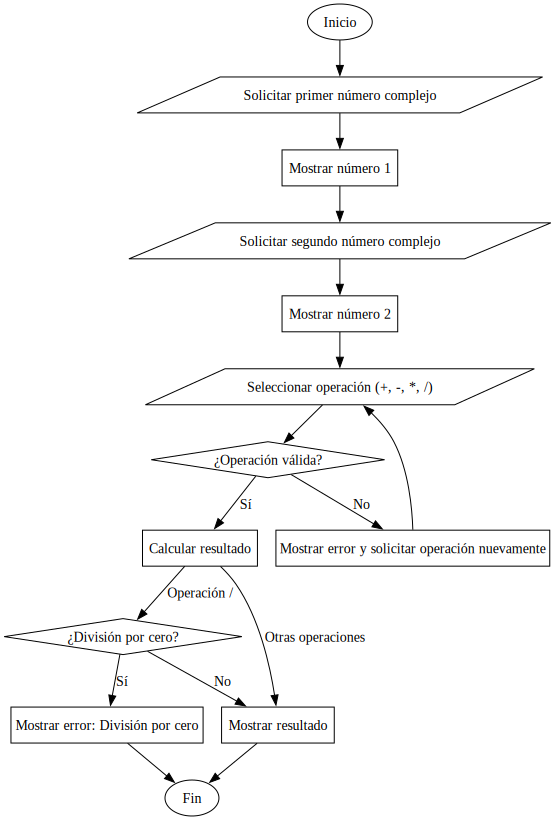

In [21]:
dot = graphviz.Digraph('Diagrama de Flujo - Calculadora de Números Complejos')

# Inicio
dot.node('Inicio', 'Inicio', shape='ellipse')

# Solicitar primer número complejo
dot.node('SolicitarNum1', 'Solicitar primer número complejo', shape='parallelogram')
dot.node('MostrarNum1', 'Mostrar número 1', shape='rectangle')

# Solicitar segundo número complejo
dot.node('SolicitarNum2', 'Solicitar segundo número complejo', shape='parallelogram')
dot.node('MostrarNum2', 'Mostrar número 2', shape='rectangle')

# Selección de operación
dot.node('SeleccionarOp', 'Seleccionar operación (+, -, *, /)', shape='parallelogram')

# Verificar operación válida
dot.node('OperacionValida?', '¿Operación válida?', shape='diamond')
dot.node('ReintentarOp', 'Mostrar error y solicitar operación nuevamente', shape='rectangle')

# Calcular resultado
dot.node('Calcular', 'Calcular resultado', shape='rectangle')

# Verificar división por cero
dot.node('DivisionCero?', '¿División por cero?', shape='diamond')
dot.node('MostrarError', 'Mostrar error: División por cero', shape='rectangle')

# Mostrar resultado
dot.node('MostrarResultado', 'Mostrar resultado', shape='rectangle')

# Fin
dot.node('Fin', 'Fin', shape='ellipse')

# Conectar nodos
dot.edge('Inicio', 'SolicitarNum1')
dot.edge('SolicitarNum1', 'MostrarNum1')
dot.edge('MostrarNum1', 'SolicitarNum2')
dot.edge('SolicitarNum2', 'MostrarNum2')
dot.edge('MostrarNum2', 'SeleccionarOp')
dot.edge('SeleccionarOp', 'OperacionValida?')

# Bifurcación si la operación no es válida
dot.edge('OperacionValida?', 'ReintentarOp', label='No')
dot.edge('ReintentarOp', 'SeleccionarOp')

# Si la operación es válida, continuar con el cálculo
dot.edge('OperacionValida?', 'Calcular', label='Sí')

# Verificar división por cero
dot.edge('Calcular', 'DivisionCero?', label='Operación /')
dot.edge('DivisionCero?', 'MostrarError', label='Sí')
dot.edge('MostrarError', 'Fin')

# Si no es división por cero, mostrar resultado
dot.edge('DivisionCero?', 'MostrarResultado', label='No')
dot.edge('Calcular', 'MostrarResultado', label='Otras operaciones')
dot.edge('MostrarResultado', 'Fin')

display(dot)

# Ejercicio 2

In [59]:

def obtener_caracteres():
    mayusculas = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    minusculas = "abcdefghijklmnopqrstuvwxyz"
    numeros = "0123456789"
    especiales = "!@#$%^&*()_-+=<>?/"
    return mayusculas, minusculas, numeros, especiales

def generar_numero_aleatorio(limite):
    return random.randint(0, limite - 1)

def generar_contraseña(longitud):
    mayusculas, minusculas, numeros, especiales = obtener_caracteres()
    
    # Garantizar al menos un carácter de cada tipo
    contrasena = [
        random.choice(mayusculas),
        random.choice(minusculas),
        random.choice(numeros),
        random.choice(especiales)
    ]
    
    # Llenar el resto de la contraseña aleatoriamente
    caracteres_totales = mayusculas + minusculas + numeros + especiales
    for _ in range(longitud - 4):
        contrasena.append(random.choice(caracteres_totales))
    
    # Mezclar los caracteres para evitar patrones
    random.shuffle(contrasena)
    
    return "".join(contrasena)

In [60]:
while True:
    try:
        longitud = int(input("Ingrese la longitud de la contraseña: "))
        if longitud < 4:
            print("La longitud debe ser al menos 4 para mayor seguridad.")
            continue
        
        contrasena = generar_contraseña(longitud)
        print(f"Contraseña generada: {contrasena}")

        time.sleep(0.5)
        
        repetir = input("¿Desea generar otra contraseña? (s/n): ").strip().lower()
        if repetir != 's':
            break
    except ValueError:
        print("Por favor, ingrese un número válido.")

Contraseña generada: +2_sW


## Diagrama

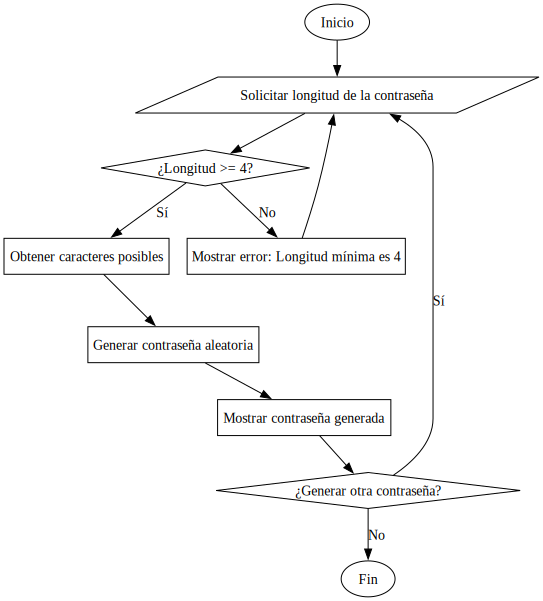

In [22]:

dot = graphviz.Digraph('Diagrama de Flujo - Generador de Contraseñas')

# Inicio
dot.node('Inicio', 'Inicio', shape='ellipse')

# Solicitar longitud de la contraseña
dot.node('SolicitarLongitud', 'Solicitar longitud de la contraseña', shape='parallelogram')

# Validar longitud
dot.node('ValidarLongitud', '¿Longitud >= 4?', shape='diamond')
dot.node('ErrorLongitud', 'Mostrar error: Longitud mínima es 4', shape='rectangle')

# Obtener caracteres
dot.node('ObtenerCaracteres', 'Obtener caracteres posibles', shape='rectangle')

# Generar contraseña
dot.node('GenerarContraseña', 'Generar contraseña aleatoria', shape='rectangle')

# Mostrar contraseña generada
dot.node('MostrarContraseña', 'Mostrar contraseña generada', shape='rectangle')

# Preguntar si se desea generar otra
dot.node('Repetir?', '¿Generar otra contraseña?', shape='diamond')
dot.node('Fin', 'Fin', shape='ellipse')

# Conectar nodos
dot.edge('Inicio', 'SolicitarLongitud')
dot.edge('SolicitarLongitud', 'ValidarLongitud')

# Si la longitud es inválida, mostrar error y volver a solicitar
dot.edge('ValidarLongitud', 'ErrorLongitud', label='No')
dot.edge('ErrorLongitud', 'SolicitarLongitud')

# Si la longitud es válida, continuar
dot.edge('ValidarLongitud', 'ObtenerCaracteres', label='Sí')
dot.edge('ObtenerCaracteres', 'GenerarContraseña')
dot.edge('GenerarContraseña', 'MostrarContraseña')

# Preguntar si se desea generar otra
dot.edge('MostrarContraseña', 'Repetir?')
dot.edge('Repetir?', 'SolicitarLongitud', label='Sí')
dot.edge('Repetir?', 'Fin', label='No')

display(dot)


# Ejercicio 3

In [45]:
def convertir_longitud(valor, unidad):
    if unidad == 'm':  # Metros a pies
        return valor * 3.28084
    elif unidad == 'ft':  # Pies a metros
        return valor / 3.28084
    else:
        return None

def convertir_temperatura(valor, unidad):
    if unidad == 'c':  # Celsius a Fahrenheit
        return (valor * 9/5) + 32
    elif unidad == 'f':  # Fahrenheit a Celsius
        return (valor - 32) * 5/9
    else:
        return None

def convertir_masa(valor, unidad):
    if unidad == 'kg':  # Kilogramos a libras
        return valor * 2.20462
    elif unidad == 'lb':  # Libras a kilogramos
        return valor / 2.20462
    else:
        return None

In [ ]:
while True:
    time.sleep(0.5)

    print("Seleccione el tipo de conversión:")
    print("1. Longitud (metros <-> pies)")
    print("2. Temperatura (Celsius <-> Fahrenheit)")
    print("3. Masa (kilogramos <-> libras)")
    opcion = input("Ingrese el número de la opción deseada: ")
    
    if opcion not in ['1', '2', '3']:
        print("Opción no válida. Intente de nuevo.")
        continue
    
    time.sleep(0.5)
    
    try:
        valor = float(input("Ingrese el valor a convertir: "))
        
        if opcion == '1':
            unidad = input("Ingrese la unidad (m para metros, ft para pies): ").strip().lower()
            resultado = convertir_longitud(valor, unidad)
            unidad_destino = 'pies' if unidad == 'm' else 'metros'
        elif opcion == '2':
            unidad = input("Ingrese la unidad (c para Celsius, f para Fahrenheit): ").strip().lower()
            resultado = convertir_temperatura(valor, unidad)
            unidad_destino = 'Fahrenheit' if unidad == 'c' else 'Celsius'
        elif opcion == '3':
            unidad = input("Ingrese la unidad (kg para kilogramos, lb para libras): ").strip().lower()
            resultado = convertir_masa(valor, unidad)
            unidad_destino = 'libras' if unidad == 'kg' else 'kilogramos'
    
        time.sleep(0.5)

        if resultado is not None:
            print(f"Resultado: {valor} {unidad} = {resultado:.2f} {unidad_destino}")
        else:
            print("Unidad no válida. Intente de nuevo.")

        time.sleep(0.5)
                
        repetir = input("¿Desea realizar otra conversión? (s/n): ").strip().lower()
        if repetir != 's':
            break
    except ValueError:
        print("Por favor, ingrese un número válido.")

## Diagrama

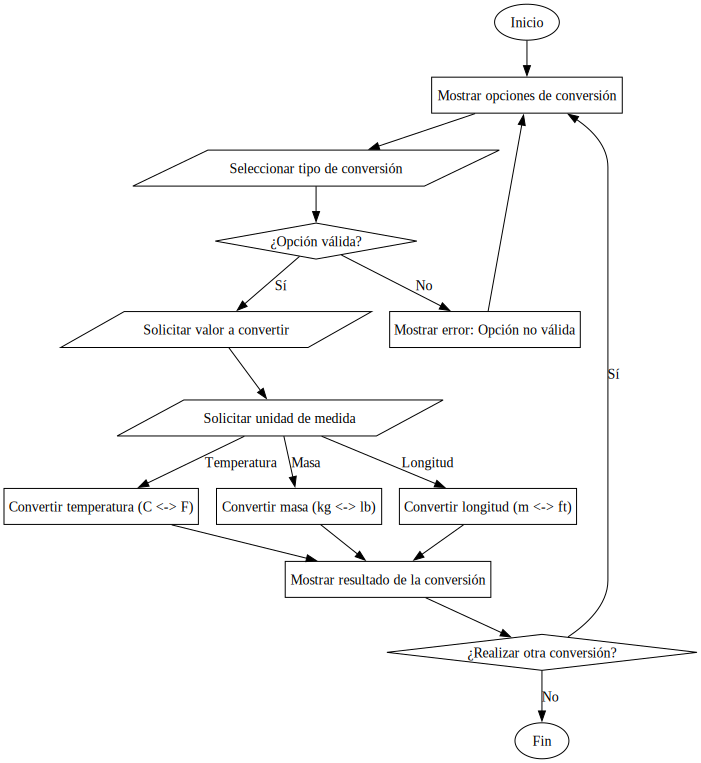

In [23]:
dot = graphviz.Digraph('Diagrama de Flujo - Conversor de Unidades')

# Inicio
dot.node('Inicio', 'Inicio', shape='ellipse')

# Mostrar opciones de conversión
dot.node('MostrarOpciones', 'Mostrar opciones de conversión', shape='rectangle')
dot.node('SeleccionarOpcion', 'Seleccionar tipo de conversión', shape='parallelogram')

# Verificar opción válida
dot.node('OpcionValida?', '¿Opción válida?', shape='diamond')
dot.node('ErrorOpcion', 'Mostrar error: Opción no válida', shape='rectangle')

# Solicitar valor a convertir
dot.node('SolicitarValor', 'Solicitar valor a convertir', shape='parallelogram')
dot.node('SolicitarUnidad', 'Solicitar unidad de medida', shape='parallelogram')

# Procesos de conversión
dot.node('ConvertirLongitud', 'Convertir longitud (m <-> ft)', shape='rectangle')
dot.node('ConvertirTemperatura', 'Convertir temperatura (C <-> F)', shape='rectangle')
dot.node('ConvertirMasa', 'Convertir masa (kg <-> lb)', shape='rectangle')

# Mostrar resultado
dot.node('MostrarResultado', 'Mostrar resultado de la conversión', shape='rectangle')

# Preguntar si desea repetir
dot.node('Repetir?', '¿Realizar otra conversión?', shape='diamond')
dot.node('Fin', 'Fin', shape='ellipse')

# Conectar nodos
dot.edge('Inicio', 'MostrarOpciones')
dot.edge('MostrarOpciones', 'SeleccionarOpcion')
dot.edge('SeleccionarOpcion', 'OpcionValida?')

# Si la opción no es válida, mostrar error y volver a solicitar
dot.edge('OpcionValida?', 'ErrorOpcion', label='No')
dot.edge('ErrorOpcion', 'MostrarOpciones')

# Si la opción es válida, continuar
dot.edge('OpcionValida?', 'SolicitarValor', label='Sí')
dot.edge('SolicitarValor', 'SolicitarUnidad')

# Rutas según tipo de conversión
dot.edge('SolicitarUnidad', 'ConvertirLongitud', label='Longitud')
dot.edge('SolicitarUnidad', 'ConvertirTemperatura', label='Temperatura')
dot.edge('SolicitarUnidad', 'ConvertirMasa', label='Masa')

# Mostrar resultado
dot.edge('ConvertirLongitud', 'MostrarResultado')
dot.edge('ConvertirTemperatura', 'MostrarResultado')
dot.edge('ConvertirMasa', 'MostrarResultado')

# Preguntar si desea repetir
dot.edge('MostrarResultado', 'Repetir?')
dot.edge('Repetir?', 'MostrarOpciones', label='Sí')
dot.edge('Repetir?', 'Fin', label='No')

display(dot)